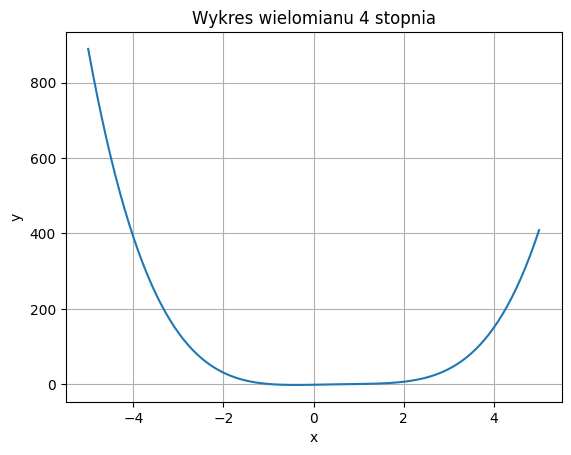

In [1]:
# prompt: wykreśl funkcję dowolny wielomian 4 stopnia

import numpy as np
import matplotlib.pyplot as plt

# Współczynniki wielomianu 4 stopnia
wspolczynniki = [1, -2, 1, 2, -1]  # np. x^4 - 2x^3 + x^2 + 2x - 1

# Zakres wartości x
x = np.linspace(-5, 5, 100)

# Obliczanie wartości wielomianu dla każdego x
y = np.polyval(wspolczynniki, x)

# Wykreślanie funkcji
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Wykres wielomianu 4 stopnia')
plt.grid(True)
plt.show()


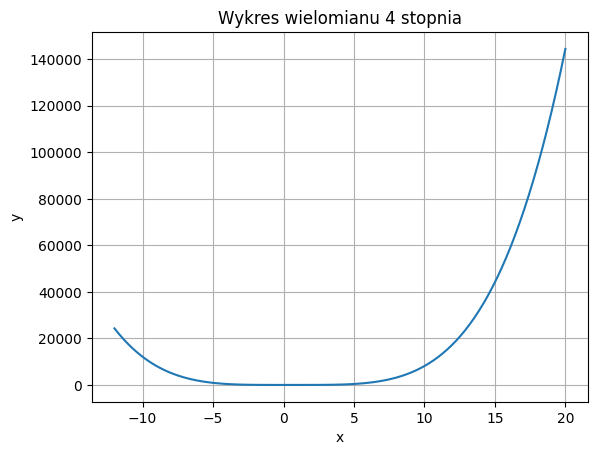

In [2]:
# prompt: rozbuduj powyższy wykres do dziedziny od -12 do 20

import numpy as np
import matplotlib.pyplot as plt


# Współczynniki wielomianu 4 stopnia
wspolczynniki = [1, -2, 1, 2, -1]  # np. x^4 - 2x^3 + x^2 + 2x - 1

# Zakres wartości x - ROZSZERZONY
x = np.linspace(-12, 20, 100)  # Zmiana zakresu na -12 do 20

# Obliczanie wartości wielomianu dla każdego x
y = np.polyval(wspolczynniki, x)

# Wykreślanie funkcji
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Wykres wielomianu 4 stopnia')
plt.grid(True)
plt.show()


In [3]:
!pip install --upgrade pip

  Using cached pip-24.2-py3-none-any.whl.metadata (3.6 kB)
Using cached pip-24.2-py3-none-any.whl (1.8 MB)
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2


In [4]:
!pip install pyyaml h5py

In [5]:
import tensorflow as tf
from tensorflow import keras
import os


In [6]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
train_labels = train_labels[:1000]
test_labels = test_labels[:1000]

train_images = train_images[:1000].reshape(-1, 28 * 28) / 255.0
test_images = test_images[:1000].reshape(-1, 28 * 28) / 255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [7]:
def create_model():
  model = tf.keras.models.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(784,)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10)
  ])

  model.compile(optimizer='adam',
                loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

  return model

model = create_model()
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
#użycie callbacks - punktów kontrolnych do zapisu wag
checkpoint_path = "training_1/cp.ckpt.weights.h5"
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                save_weights_only=True,
                                                verbose=1)
model.fit(train_images,
          train_labels,
          epochs=10,
          validation_data=(test_images, test_labels),
          callbacks=[cp_callback])

Epoch 1/10
26/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4646 - loss: 1.7137
Epoch 1: saving model to training_1/cp.ckpt.weights.h5
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.5040 - loss: 1.6058 - val_accuracy: 0.7780 - val_loss: 0.7347
Epoch 2/10
26/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8576 - loss: 0.4748
Epoch 2: saving model to training_1/cp.ckpt.weights.h5
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8620 - loss: 0.4641 - val_accuracy: 0.8340 - val_loss: 0.5490
Epoch 3/10
25/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9391 - loss: 0.2835
Epoch 3: saving model to training_1/cp.ckpt.weights.h5
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9353 - loss: 0.2891 - val_accuracy: 0.8430 - val_loss: 0.4931
Epoch 4/10
24/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9666 - loss: 0.1802
Epoch 4: saving model to training_1/cp.ckpt.weights.h5
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9630 - loss: 0.1862 - val_accuracy: 0.8540

In [12]:
model = create_model()
loss, acc = model.evaluate(test_images, test_labels, verbose=2)
print("Untrained model, accuracy: {:5.2f}%".format(100 * acc))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 - 0s - 14ms/step - accuracy: 0.1420 - loss: 2.2960
Untrained model, accuracy: 14.20%


In [13]:
model.load_weights(checkpoint_path)
loss, acc = model.evaluate(test_images, test_labels, verbose=2)
print("Untrained model, accuracy: {:5.2f}%".format(100 * acc))

32/32 - 0s - 3ms/step - accuracy: 0.8600 - loss: 0.4379
Untrained model, accuracy: 86.00%


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
